In [1]:
import cv2
import matplotlib.pyplot as plt

import keras
from keras.applications.vgg19 import VGG19
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [2]:
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [3]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
train_dir = 'Face Mask Dataset/Train'
test_dir = 'Face Mask Dataset/Test'
val_dir = 'Face Mask Dataset/Validation'

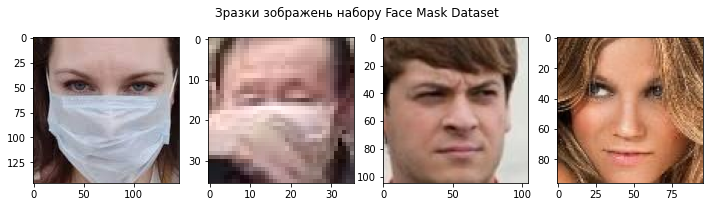

In [5]:
imgs = [cv2.imread('Face Mask Dataset/Train/' + x) for x in ['WithMask/1025.png',
                                                             'WithMask/19.png',
                                                             'WithoutMask/1273.png',
                                                             'WithoutMask/1274.png']]
imgs = [cv2.cvtColor(x, cv2.COLOR_RGB2BGR) for x in imgs]


fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i, img in enumerate(imgs):
    ax[i].imshow(img)
    
fig.suptitle('Зразки зображень набору Face Mask Dataset')
plt.show()

In [6]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0 / 255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(128, 128),
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_generator = val_datagen.flow_from_directory(directory=val_dir,
                                                target_size=(128, 128),
                                                class_mode='categorical',
                                                batch_size=batch_size)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(128, 128),
                                                  class_mode='categorical',
                                                  batch_size=batch_size)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=val_generator)

Epoch 1/15
313/313 [==============================] - 1258s 4s/step - loss: 0.0466 - accuracy: 0.9840 - val_loss: 0.0160 - val_accuracy: 0.9975
Epoch 2/15
159/313 [==============>...............] - ETA: 9:14 - loss: 0.0350 - accuracy: 0.9886

KeyboardInterrupt: 

In [8]:
history.history

{'loss': [0.5741506218910217,
  0.2829672694206238,
  0.15698464214801788,
  0.1980871856212616,
  0.16296453773975372,
  0.0993509516119957,
  0.12198151648044586,
  0.08966633677482605,
  0.08678027987480164,
  0.06184004247188568,
  0.09300006926059723,
  0.07155630737543106,
  0.05855958163738251,
  0.08792736381292343,
  0.09481928497552872],
 'accuracy': [0.6909722089767456,
  0.8860294222831726,
  0.9444444179534912,
  0.9097222089767456,
  0.9375,
  0.9618055820465088,
  0.9513888955116272,
  0.9722222089767456,
  0.96875,
  0.9895833134651184,
  0.9722222089767456,
  0.9756944179534912,
  0.9826388955116272,
  0.9722222089767456,
  0.9652777910232544]}

KeyError: 'val_accuracy'

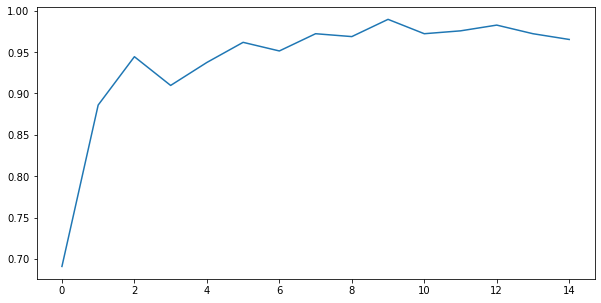

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Точність для тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність для валідаційних даних')

plt.title('Точність класифікації впродовж навчання')          
plt.ylabel('Точність')
plt.xlabel('Номер епохи тренування')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_generator)